In [1]:
import os

In [2]:
os.chdir("../core/")

In [3]:
%%capture
from load_datasets import *
from ensemble import *
from saliency import *
from scipy.stats import describe

In [4]:
(SVHN_trainX, SVHN_trainY),(SVHN_testX, SVHN_testY) = load_data("SVHN")
(MNIST_trainX, MNIST_trainY),(MNIST_testX, MNIST_testY) = load_data("MNIST")
NotMNIST = load_data("NotMNIST")
(CIFAR10_trainX, CIFAR10_trainY),(CIFAR10_testX, CIFAR10_testY) = load_data("CIFAR10")

../../datasets/notMNIST_small/A
Could not read: ../../datasets/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/B
../../datasets/notMNIST_small/C
../../datasets/notMNIST_small/D
../../datasets/notMNIST_small/E
../../datasets/notMNIST_small/F
Could not read: ../../datasets/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/G
../../datasets/notMNIST_small/H
../../datasets/notMNIST_small/I
../../datasets/notMNIST_small/J


In [5]:
MNIST_trainX,MNIST_testX = pad_dataset(MNIST_trainX),pad_dataset(MNIST_testX)
NotMNIST = pad_dataset(NotMNIST)

# Creating ensemble

In [6]:
SVHN_lenet = get_lenet(input_shape = np.shape(SVHN_trainX[0]))
train_network(network = SVHN_lenet, trainX = SVHN_trainX, trainY = SVHN_trainY)
SVHN_lenets = clone_network_into_ensemble(number_of_networks = 5, network = SVHN_lenet)
train_ensemble(ensemble = SVHN_lenets, trainX = SVHN_trainX, trainY = SVHN_trainY)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
73257/73257 [==============================] - 17s 226us/step - loss: 1.9023 - acc: 0.3408
Epoch 2/5
73257/73257 [==============================] - 14s 184us/step - loss: 0.7081 - acc: 0.7943
Epoch 3/5
73257/73257 [==============================] - 13s 184us/step - loss: 0.5223 - acc: 0.8524
Epoch 4/5
73257/73257 [==============================] - 13s 184us/step - loss: 0.4443 - acc: 0.8739
Epoch 5/5
73257/73257 [==============================] - 13s 184us/step - loss: 0.3909 - acc: 0.8889
Epoch 1/5
73257/73257 [==============================] - 14s 194us/step - loss: 1.8131 - acc: 0.3778
Epoch 2/5
73257/73257 [==============================] - 14s 186us/step - loss: 0.7718 - acc: 0.7722
Epoch 3/5
73257/73257 [==============================] - 14s 186us/step - loss: 0.5591 - acc: 0.8399
Epoch 4/5
73257/73257 [==============================] - 14s 188us/step - loss: 0.4623 - acc: 0.8688
Epoch 5/5
73257/73257 [==============================] - 14s 185us/step - loss: 0.4039 - ac

In [8]:
SVHN_optimizers = get_ensemble_optimisers(ensemble = SVHN_lenets, grad_cam = True)

# Extracting data

## SVHN

In [9]:
SVHN_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_output_values_of_predicted_outputs = np.take(SVHN_outputs_values,SVHN_predicted_outputs)

In [10]:
SVHN_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,SVHN_testX,10)
SVHN_majority_voting_predicted_outputs = np.argmax(SVHN_ensemble_votes,axis = 1)
SVHN_vote_ratios_of_predicted_outputs = np.max(SVHN_ensemble_votes,axis = 1)/5
SVHN_different_instances_between_voting_and_averaging = np.nonzero(SVHN_majority_voting_predicted_outputs-SVHN_predicted_outputs)[0]

In [11]:
SVHN_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = SVHN_testX,
    output_nodes = SVHN_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9,
    grad_cam = True)

SVHN_uncertainties = calculate_uncertainties_with_maps(SVHN_saliency_maps)

100%|██████████| 26032/26032 [01:48<00:00, 239.99it/s]


In [12]:
SVHN_singular_predictions_values = SVHN_lenet.predict(SVHN_testX)

In [13]:
SVHN_variance = np.var(SVHN_singular_predictions_values,axis = 1)

## CIFAR10

In [14]:
CIFAR10_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_output_values_of_predicted_outputs = np.take(CIFAR10_outputs_values,CIFAR10_predicted_outputs)

In [15]:
CIFAR10_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,CIFAR10_testX,10)
CIFAR10_majority_voting_predicted_outputs = np.argmax(CIFAR10_ensemble_votes,axis = 1)
CIFAR10_vote_ratios_of_predicted_outputs = np.max(CIFAR10_ensemble_votes,axis = 1)/5
CIFAR10_different_instances_between_voting_and_averaging = np.nonzero(CIFAR10_majority_voting_predicted_outputs-CIFAR10_predicted_outputs)[0]

In [16]:
CIFAR10_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = CIFAR10_testX,
    output_nodes = CIFAR10_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9,
    grad_cam = True)

CIFAR10_uncertainties = calculate_uncertainties_with_maps(CIFAR10_saliency_maps)

100%|██████████| 10000/10000 [00:41<00:00, 242.44it/s]


In [17]:
CIFAR10_singular_predictions_values = SVHN_lenet.predict(CIFAR10_testX)

In [18]:
CIFAR10_variance = np.var(CIFAR10_singular_predictions_values,axis = 1)

## MNIST

In [19]:
MNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_output_values_of_predicted_outputs = np.take(MNIST_outputs_values,MNIST_predicted_outputs)

In [20]:
MNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,MNIST_testX,10)
MNIST_majority_voting_predicted_outputs = np.argmax(MNIST_ensemble_votes,axis = 1)
MNIST_vote_ratios_of_predicted_outputs = np.max(MNIST_ensemble_votes,axis = 1)/5
MNIST_different_instances_between_voting_and_averaging = np.nonzero(MNIST_majority_voting_predicted_outputs-MNIST_predicted_outputs)[0]

In [21]:
MNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = MNIST_testX,
    output_nodes = MNIST_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9,
    grad_cam = True)

MNIST_uncertainties = calculate_uncertainties_with_maps(MNIST_saliency_maps)

100%|██████████| 10000/10000 [00:41<00:00, 242.60it/s]


In [22]:
MNIST_singular_predictions_values = SVHN_lenet.predict(MNIST_testX)

In [23]:
MNIST_variance = np.var(MNIST_singular_predictions_values,axis = 1)

## NotMNIST

In [24]:
NotMNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_output_values_of_predicted_outputs = np.take(NotMNIST_outputs_values,NotMNIST_predicted_outputs)

In [25]:
NotMNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,NotMNIST,10)
NotMNIST_majority_voting_predicted_outputs = np.argmax(NotMNIST_ensemble_votes,axis = 1)
NotMNIST_vote_ratios_of_predicted_outputs = np.max(NotMNIST_ensemble_votes,axis = 1)/5
NotMNIST_different_instances_between_voting_and_averaging = np.nonzero(NotMNIST_majority_voting_predicted_outputs-NotMNIST_predicted_outputs)[0]

In [27]:
NotMNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = NotMNIST,
    output_nodes = NotMNIST_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9,
    grad_cam = True)

NotMNIST_uncertainties = calculate_uncertainties_with_maps(NotMNIST_saliency_maps)

100%|██████████| 18724/18724 [01:17<00:00, 242.77it/s]


In [28]:
NotMNIST_singular_predictions_values = SVHN_lenet.predict(NotMNIST)

In [29]:
NotMNIST_variance = np.var(NotMNIST_singular_predictions_values,axis = 1)

# Exploring data

In [30]:
# General evaluation
print("Evaluation (loss,acc) of singular LeNet:")
print(SVHN_lenet.evaluate(SVHN_testX, SVHN_testY))
print("")
print("Evaluation (loss,acc) of each LeNet in the ensemble:")
for lenet in SVHN_lenets:
    print(lenet.evaluate(SVHN_testX, SVHN_testY))
print("")
print("Accuracy of ensemble:")
print(evaluate_ensemble_accuracy(SVHN_lenets,SVHN_testX,SVHN_testY))
print("")
print("Averaged softmax output values of any output node of the ensemble:")
print(describe(SVHN_outputs_values,axis=None))
print("")
print("Averaged softmax output values of the ensemble's predicted outputs:")
print(describe(SVHN_output_values_of_predicted_outputs))
print("")
print("Softmax output values of the singular LeNet's outputs:")
print(describe(SVHN_lenet.predict(SVHN_testX),axis = None))
print("")

Evaluation (loss,acc) of singular LeNet:
26032/26032 [==============================] - 2s 94us/step
[0.47491340075414024, 0.8664336201598033]

Evaluation (loss,acc) of each LeNet in the ensemble:
26032/26032 [==============================] - 2s 94us/step
[0.4756398551399604, 0.865319606637984]
26032/26032 [==============================] - 2s 96us/step
[0.5532847803083752, 0.844998463429625]
26032/26032 [==============================] - 2s 95us/step
[0.48373070982935684, 0.8652043638598648]
26032/26032 [==============================] - 3s 97us/step
[0.4675477585161692, 0.8709280885064536]
26032/26032 [==============================] - 2s 95us/step
[0.4670824418788903, 0.8695067609096496]

Accuracy of ensemble:
0.8844499078057775

Averaged softmax output values of any output node of the ensemble:
DescribeResult(nobs=260320, minmax=(4.332927734788354e-24, 1.0), mean=0.10000000010857692, variance=0.0669546709189509, skewness=2.7656647926520077, kurtosis=6.143498632200798)

Averaged so

## SVHN

In [31]:
plt.style.use('default')

Statistical description of uncertainty values:
DescribeResult(nobs=26032, minmax=(0.25582849884639647, 1.3122129019310182), mean=0.48451859744173326, variance=0.004431590259393402, skewness=0.5662881959515748, kurtosis=3.0577559020553124)
Histogram of uncertainty values:


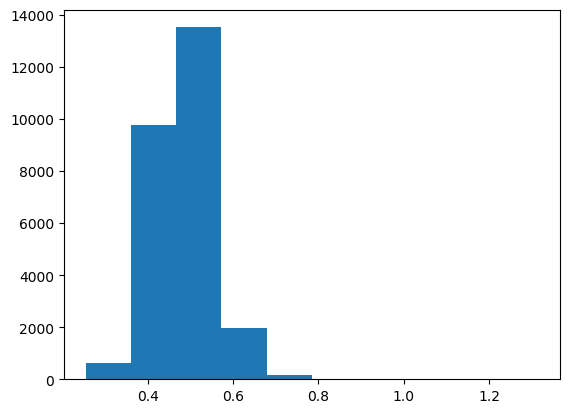

In [32]:
print("Statistical description of uncertainty values:")
print(describe(SVHN_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(SVHN_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


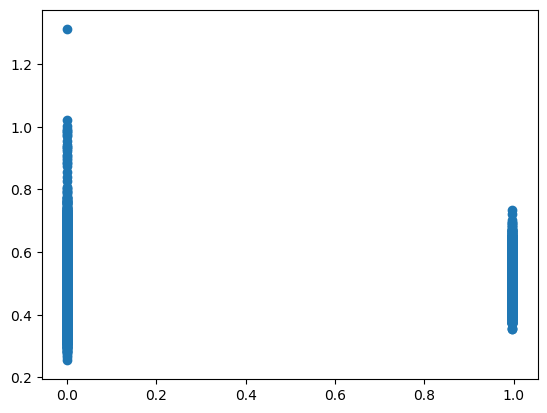

In [33]:
plt.scatter(x = SVHN_output_values_of_predicted_outputs, y = SVHN_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=26032, minmax=(0.0021767165, 0.089999996), mean=0.0704876, variance=0.0005924184, skewness=-1.0755987167358398, kurtosis=-0.2092822429975727)


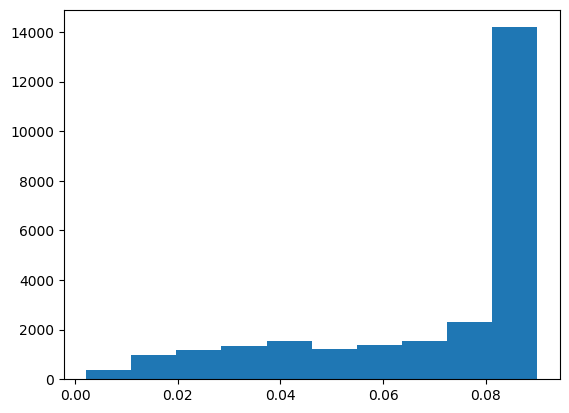

In [34]:
print("Variance of singular LeNet's outputs for each input")
print(describe(SVHN_variance))
plt.hist(SVHN_variance)
plt.show()

637
0.9755301167793485
DescribeResult(nobs=26032, minmax=(0.2, 1.0), mean=0.9322295636140135, variance=0.02207519481110378, skewness=-2.181047680048831, kurtosis=3.7898360719601003)


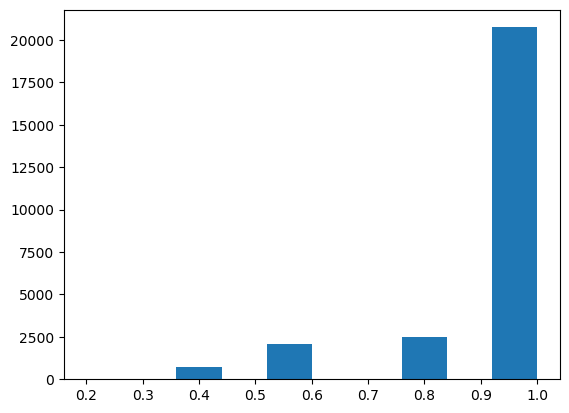

In [35]:
print(len(SVHN_different_instances_between_voting_and_averaging))
print(1 - len(SVHN_different_instances_between_voting_and_averaging)/len(SVHN_testX))
print(describe(SVHN_vote_ratios_of_predicted_outputs))
plt.hist(SVHN_vote_ratios_of_predicted_outputs)
plt.show()

## CIFAR10

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.19297254256744836, 0.946176339868853), mean=0.502917966640748, variance=0.003968759230894876, skewness=0.501548963903891, kurtosis=2.4838221475844406)
Histogram of uncertainty values:


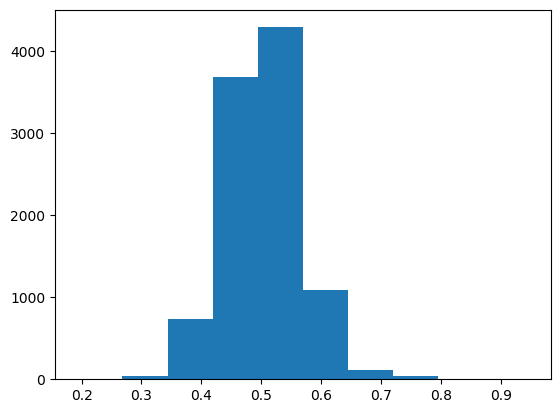

In [36]:
print("Statistical description of uncertainty values:")
print(describe(CIFAR10_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(CIFAR10_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


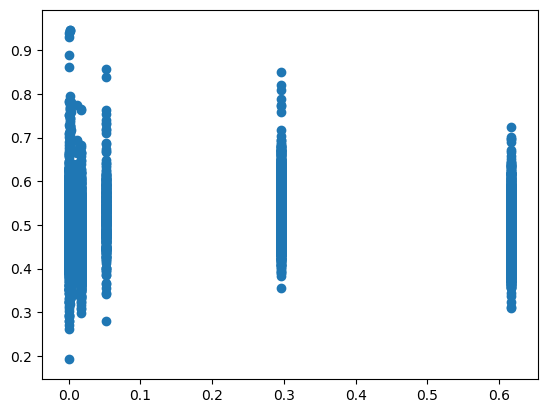

In [37]:
plt.scatter(x = CIFAR10_output_values_of_predicted_outputs, y = CIFAR10_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.0018231894, 0.089999944), mean=0.04135752, variance=0.00057740795, skewness=0.5129336714744568, kurtosis=-0.9243981963246815)


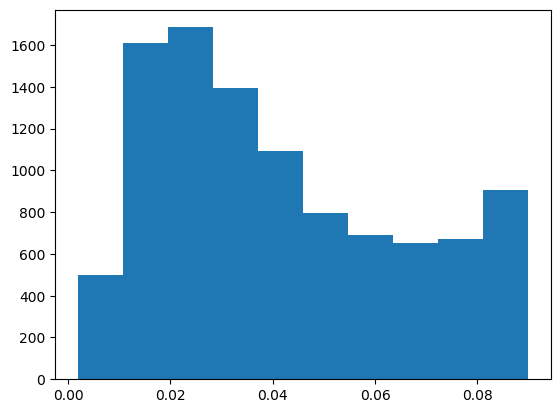

In [38]:
print("Variance of singular LeNet's outputs for each input")
print(describe(CIFAR10_variance))
plt.hist(CIFAR10_variance)
plt.show()

1189
0.8811
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.71124, variance=0.04592625502550255, skewness=-0.04608392316397919, kurtosis=-1.1425809708921988)


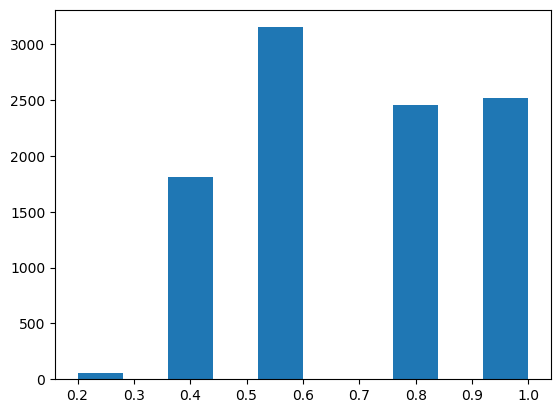

In [39]:
print(len(CIFAR10_different_instances_between_voting_and_averaging))
print(1 - len(CIFAR10_different_instances_between_voting_and_averaging)/len(CIFAR10_testX))
print(describe(CIFAR10_vote_ratios_of_predicted_outputs))
plt.hist(CIFAR10_vote_ratios_of_predicted_outputs)
plt.show()

## MNIST

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.24326990396595696, 0.7601637153069312), mean=0.4586786985986021, variance=0.003823631128430254, skewness=-0.207903600966649, kurtosis=0.12351014255386694)
Histogram of uncertainty values:


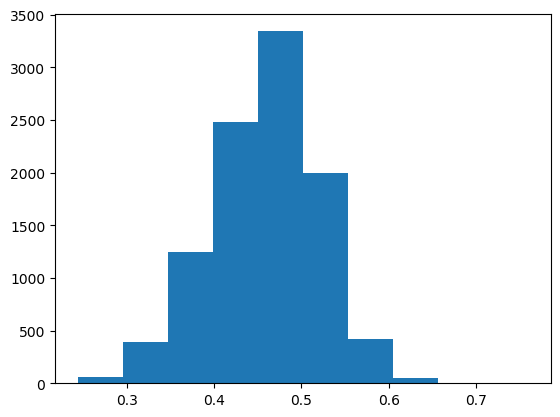

In [40]:
print("Statistical description of uncertainty values:")
print(describe(MNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(MNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


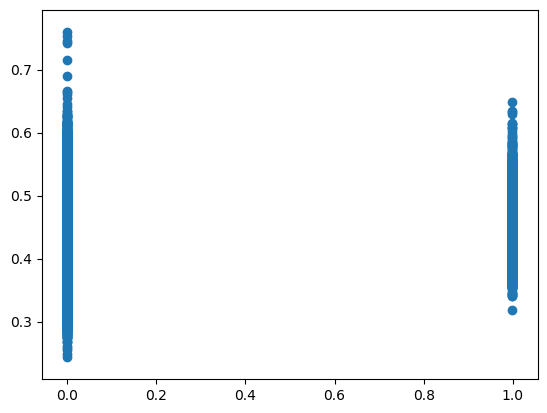

In [41]:
plt.scatter(x = MNIST_output_values_of_predicted_outputs, y = MNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.013693, 0.08999999), mean=0.07567053, variance=0.00039030827, skewness=-1.2277166843414307, kurtosis=0.15692791085642588)


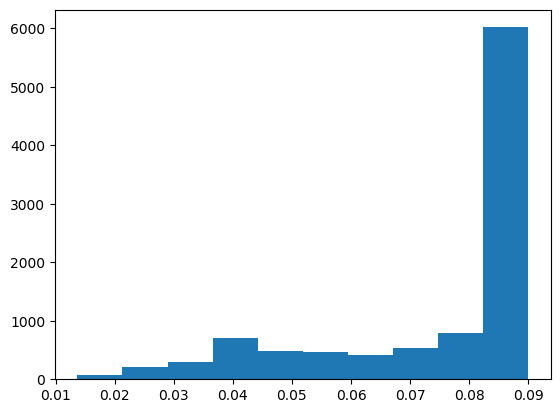

In [42]:
print("Variance of singular LeNet's outputs for each input")
print(describe(MNIST_variance))
plt.hist(MNIST_variance)
plt.show()

433
0.9567
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.85156, variance=0.03668923532353236, skewness=-0.9379825936548215, kurtosis=-0.3932971987097318)


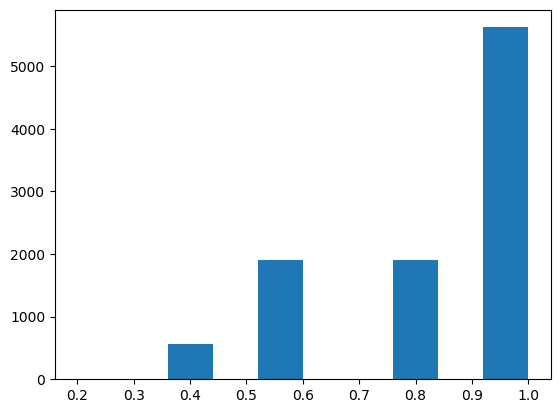

In [43]:
print(len(MNIST_different_instances_between_voting_and_averaging))
print(1 - len(MNIST_different_instances_between_voting_and_averaging)/len(MNIST_testX))
print(describe(MNIST_vote_ratios_of_predicted_outputs))
plt.hist(MNIST_vote_ratios_of_predicted_outputs)
plt.show()

## NotMNIST

Statistical description of uncertainty values:
DescribeResult(nobs=18724, minmax=(0.1742764545749258, 1.2540473160109573), mean=0.4823292416197563, variance=0.006522854299233072, skewness=0.08825710286537161, kurtosis=1.5191354255484697)
Histogram of uncertainty values:


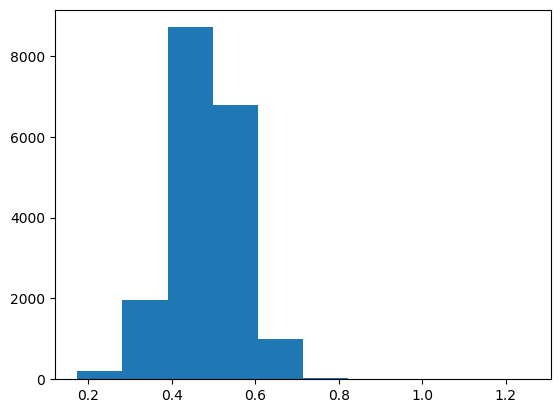

In [44]:
print("Statistical description of uncertainty values:")
print(describe(NotMNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(NotMNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


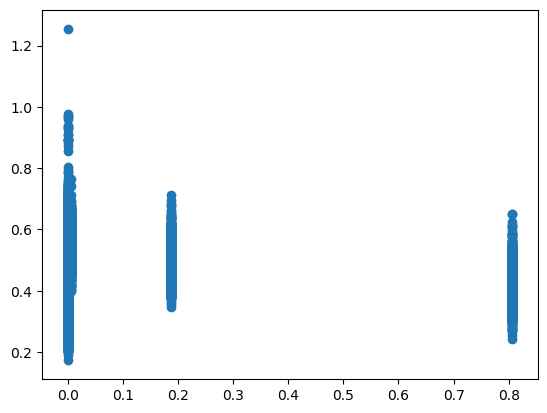

In [45]:
plt.scatter(x = NotMNIST_output_values_of_predicted_outputs, y = NotMNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=18724, minmax=(0.004490697, 0.08999999), mean=0.06955064, variance=0.0005369244, skewness=-0.8666782975196838, kurtosis=-0.5773528759936357)


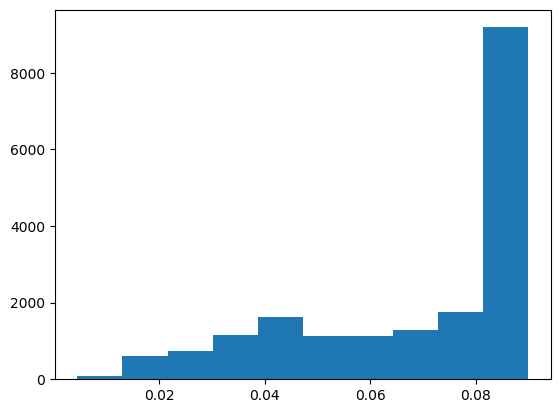

In [46]:
print("Variance of singular LeNet's outputs for each input")
print(describe(NotMNIST_variance))
plt.hist(NotMNIST_variance)
plt.show()

DescribeResult(nobs=18724, minmax=(0.2, 1.0), mean=0.7684148686178167, variance=0.04642421371044047, skewness=-0.383352943627532, kurtosis=-1.095508131084883)


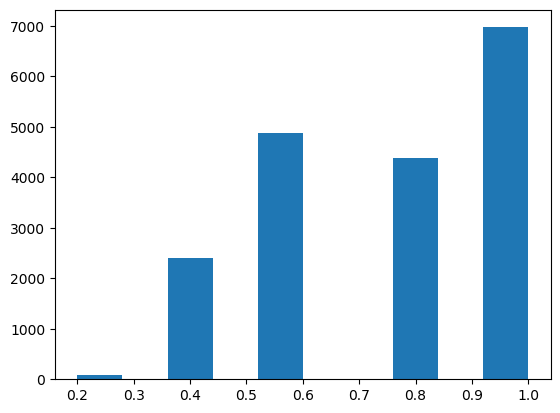

In [47]:
print(describe(NotMNIST_vote_ratios_of_predicted_outputs))
plt.hist(NotMNIST_vote_ratios_of_predicted_outputs)
plt.show()